### Start by reading the data 

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
in_dir="./data"
txt_name="/irisdata.txt"
iris_data = np.loadtxt(in_dir + txt_name, comments="%")
# x is a matrix with 50 rows and 4 columns
x = iris_data[0:50, 0:4]

In [2]:
n_feat = x.shape[1]
n_obs = x.shape[0]
print(f"Number of features: {n_feat} and number of observations: {n_obs}")

Number of features: 4 and number of observations: 50


### EDA


In [3]:
#vector for each of the flowers types
sep_l = x[:, 0]
sep_w = x[:, 1]
pet_l = x[:, 2]
pet_w = x[:, 3]

In [4]:
# Use ddof = 1 to make an unbiased estimate
# ddof es necesario usarlo cuando estamos calculando subsets de un dataset
var_sep_l = sep_l.var(ddof=1)
print(f'Variance of sepal length: {var_sep_l:.4f}')

var_sep_w = sep_w.var(ddof=1)
print(f'Variance of sepal width: {var_sep_w:.4f}')

var_pet_l = pet_l.var(ddof=1)
print(f'Variance of petal length: {var_pet_l:.4f}')

var_pet_w = pet_w.var(ddof=1)
print(f'Variance of petal width: {var_pet_w:.4f}')


Variance of sepal length: 0.1242
Variance of sepal width: 0.1437
Variance of petal length: 0.0302
Variance of petal width: 0.0111


#### Now compute the covariance

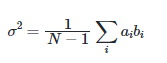

In [5]:
def covariance_famu(x,y):
    suma = np.sum(x * y)
    leng = len(x)
    cov = suma/(leng-1)
    print(cov)

cov_sep = covariance_famu(sep_l, sep_w)
cov_pet = covariance_famu(pet_l, pet_w)

17.61
0.37306122448979595


In [6]:
def covariance(x, y):
    # Finding the mean of the series x and y
    mean_x = sum(x)/float(len(x))
    mean_y = sum(y)/float(len(y))
    # Subtracting mean from the individual elements
    sub_x = [i - mean_x for i in x]
    sub_y = [i - mean_y for i in y]
    numerator = sum([sub_x[i]*sub_y[i] for i in range(len(sub_x))])
    denominator = len(x)-1
    cov = numerator/denominator
    return cov

sepal_cov = covariance(sep_l, sep_w)
print(f'The covariance for sepal length and sepal width is: {sepal_cov:.4f}')

petal_cov = covariance(pet_l, pet_w)
print(f'The covariance for petal length and petal width is: {petal_cov:.4f}')

print(np.cov(sep_l, sep_w))
print('---------')
print(np.cov(pet_l, pet_w))

The covariance for sepal length and sepal width is: 0.0992
The covariance for petal length and petal width is: 0.0061
[[0.12424898 0.09921633]
 [0.09921633 0.1436898 ]]
---------
[[0.03015918 0.00606939]
 [0.00606939 0.01110612]]


### Some plots

<Figure size 640x480 with 0 Axes>

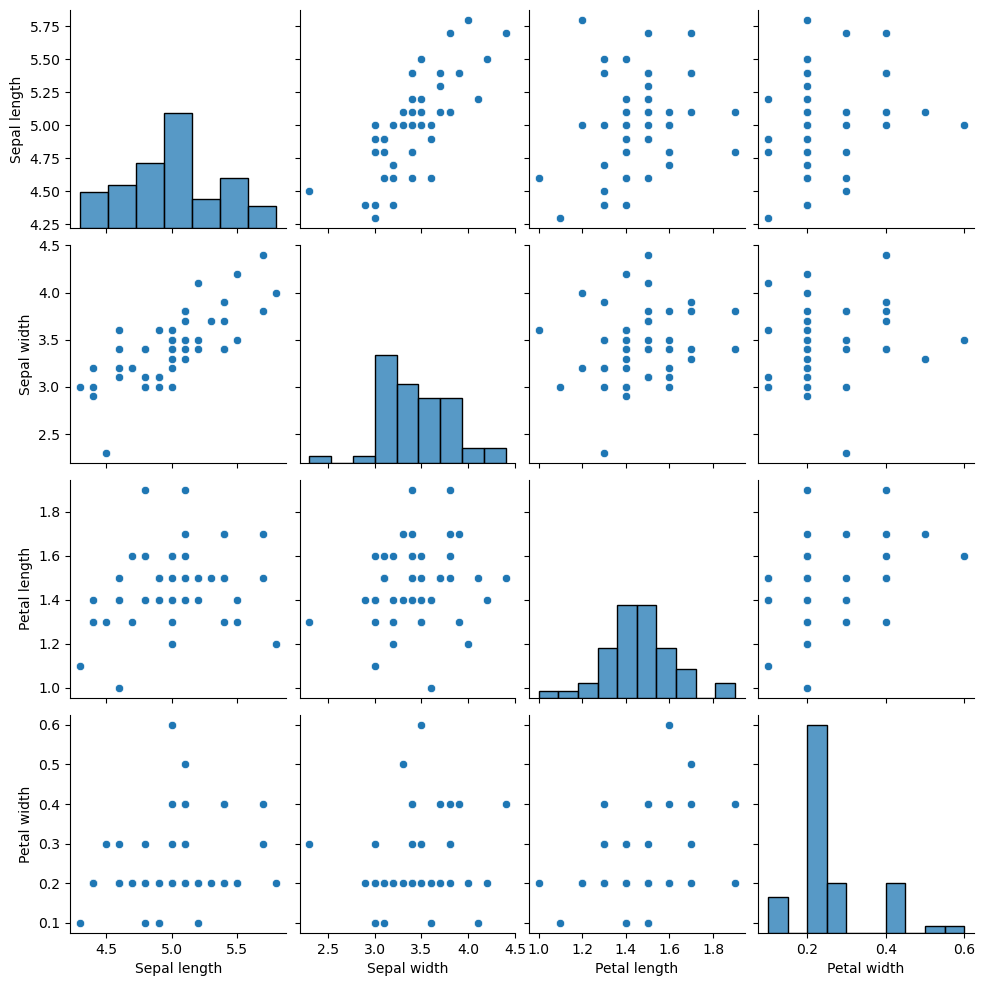

In [7]:
plt.figure() # Added this to make sure that the figure appear
# Transform the data into a Pandas dataframe
d = pd.DataFrame(x, columns=['Sepal length', 'Sepal width',
							 'Petal length', 'Petal width'])
sns.pairplot(d)
plt.show()

###  PCA analysis
WE will try to calculate the covariance in an other way
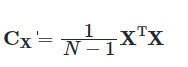

In [8]:
mn = np.mean(x, axis=0)
data = x - mn
# Subtracting mn from x effectively centers the data by making the new mean of data equal to zero. 

In [9]:
sep_l_new = data[:, 0]
sep_w_new = data[:, 1]
pet_l_new = data[:, 2]
pet_w_new = data[:, 3]

In [10]:
def new_covariance(x,y):
    mats = np.matmul(x, y.T)
    mats_len = len(x)
    new_cov = mats/(mats_len-1)
    print(new_cov)

cov_sep_l_w=new_covariance(sep_l_new, sep_w_new)
cov_pet_l_w=new_covariance(pet_l_new, pet_w_new)
#we do not get the same values as above because we have centered the data first, 
#the same if we do: np.cov(x,y)

0.09921632653061223
0.0060693877551020415


No, no es estrictamente necesario centrar los datos antes de realizar un Análisis de Componentes Principales (PCA), pero es una práctica común y generalmente recomendable. El centrado de datos puede tener ventajas significativas en el contexto del PCA:

1. **Interpretabilidad**: Centrar los datos hace que la primera componente principal (PC1) capture la dirección de máxima varianza en los datos originales. Sin centrar, PC1 también puede incluir información sobre la ubicación de los datos, lo que puede hacer que la interpretación de las componentes principales sea menos clara.

2. **Eliminación de la Dependencia de la Media**: Cuando se centran los datos, se elimina la dependencia de la media de las componentes principales, lo que significa que las componentes no están influenciadas por la ubicación de los datos en el espacio. Esto es útil porque el PCA se utiliza a menudo para reducir la dimensionalidad de los datos mientras se conserva la mayor parte de la información de varianza. Si no centras los datos, las componentes principales pueden estar fuertemente influenciadas por la ubicación de los datos, lo que podría no ser lo que deseas.

3. **Facilita la Comparación entre Variables**: Si tienes variables en diferentes escalas o unidades, el centrado de datos puede ayudar a que el PCA sea más robusto y evita que las variables con mayor escala dominen las componentes principales.

Dicho esto, en algunos casos, como cuando tienes datos ya centrados o cuando la ubicación de los datos es intrascendente para tu análisis, podrías optar por no centrar los datos antes de realizar el PCA. Sin embargo, en la mayoría de los casos, es una buena práctica centrar los datos antes de aplicar el PCA para obtener resultados más interpretables y robustos. L

### Calculate the values and vectors of PCA
The values are the eigenvalues and the vectors are the eigenvectors (the principal components).

Eigenvalores (Valores Propios): Los eigenvalores representan la varianza explicada por cada componente principal. **Un eigenvalor positivo indica que la componente principal asociada explica una cantidad positiva de varianza en los datos**. Un eigenvalor negativo sería problemático ya que implicaría que la componente principal está invirtiendo la varianza, lo que no tendría sentido en el contexto de PCA. En tu caso, ambos eigenvalores son positivos, lo que es una señal positiva de que los resultados son razonables.

Eigenvectores (Vectores Propios): Los eigenvectores son direcciones en las cuales los datos varían. Los signos positivos o negativos de los eigenvectores pueden variar sin afectar la dirección real de la variación. En otras palabras, si multiplicas un eigenvector por un valor positivo o negativo, la dirección sigue siendo la misma, pero la escala (longitud) del eigenvector cambia. Por lo tanto, los signos de los eigenvectores son arbitrarios y pueden variar de implementación en implementación o incluso de ejecución a ejecución.

En resumen, en PCA, **los eigenvalores positivos indican que las componentes principales explican una cantidad significativa de varianza en tus datos, lo cual es deseable. Los signos positivos o negativos en los eigenvectores son arbitrarios y no afectan la interpretación de las direcciones de variación, ya que solo representan una elección de orientación en el espacio de características.** Puedes cambiar el signo de un eigenvector sin cambiar su interpretación subyacente.

In [11]:
c_x=np.cov(data.T)
values, vectors = np.linalg.eig(c_x)

In [12]:
values

array([0.23645569, 0.03691873, 0.0267964 , 0.00903326])

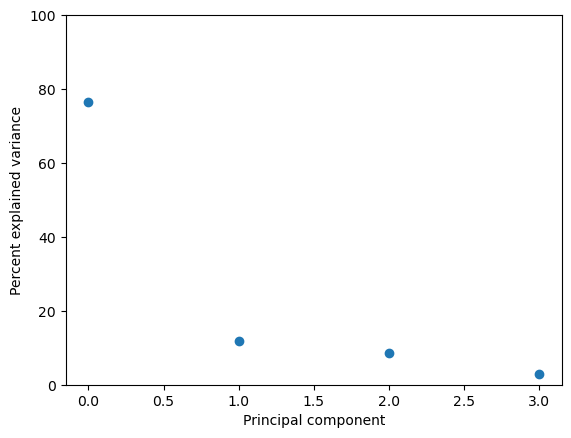

In [13]:
v_norm = values / values.sum() * 100
plt.plot(v_norm, "o")
plt.xlabel('Principal component')
plt.ylabel('Percent explained variance')
plt.ylim([0, 100])
plt.show()

El primer componente explica mucha varianza en comparacion con los otros componentes 

explica mucha varianza, significa que ese componente captura una parte significativa de la variabilidad presente en los datos originales. En otras palabras, este componente es capaz de resumir y representar una gran cantidad de información contenida en los datos originales.

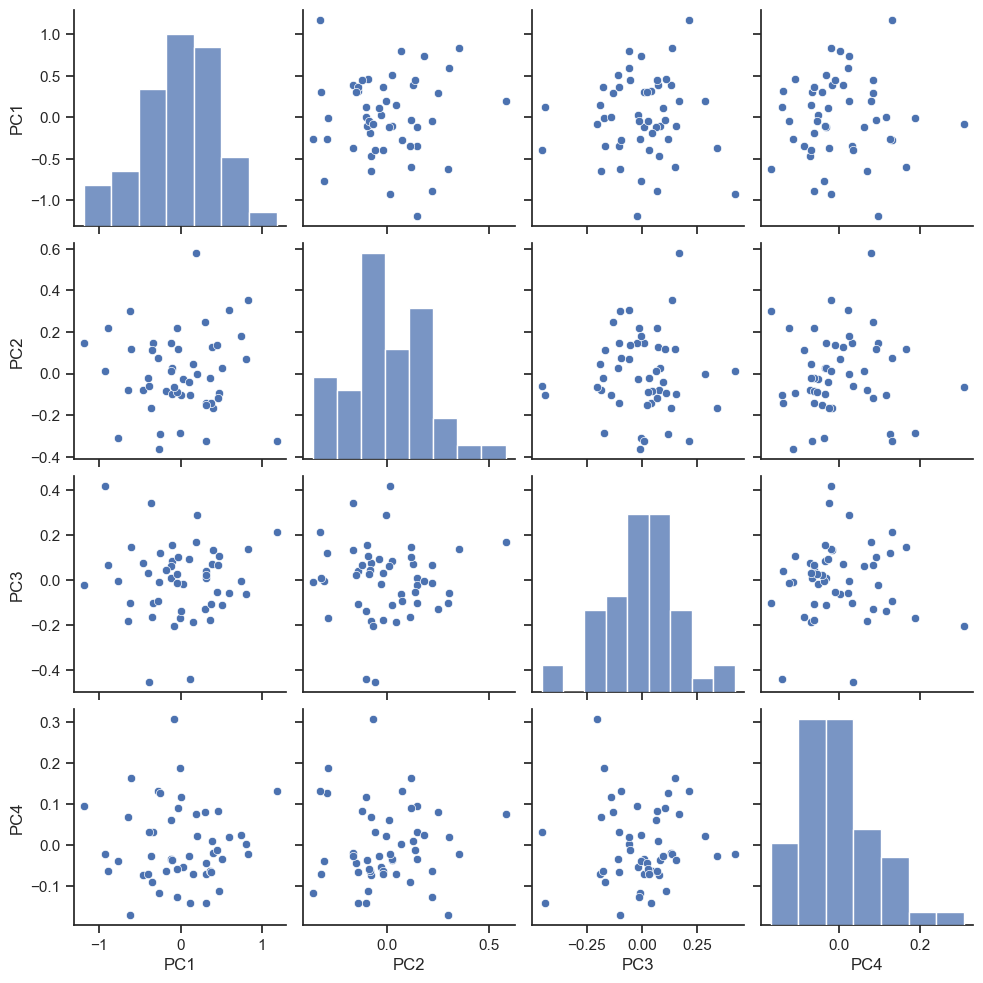

In [15]:
# Assuming 'vectors' are your PCA vectors and 'data' is your data
# Calculate the projected data
pc_proj = vectors.T.dot(data.T)

# Convert the projected data to a DataFrame
pc_proj_df = pd.DataFrame(pc_proj.T, columns=[f'PC{i+1}' for i in range(pc_proj.shape[0])])

# Use Seaborn's pairplot to visualize the covariance structure
sns.set(style="ticks")
sns.pairplot(pc_proj_df)


By examining the pairplot, you can observe the relationships and covariances between different principal components (PC1, PC2, etc.). This can provide insights into how the principal components are correlated with each other and the overall structure of the data in the PCA space.

In [16]:
from sklearn import decomposition

### PCA in python with sklearn

In [17]:
pca = decomposition.PCA()
pca.fit(x)
values_pca = pca.explained_variance_
exp_var_ratio = pca.explained_variance_ratio_
vectors_pca = pca.components_

data_transform = pca.transform(data)

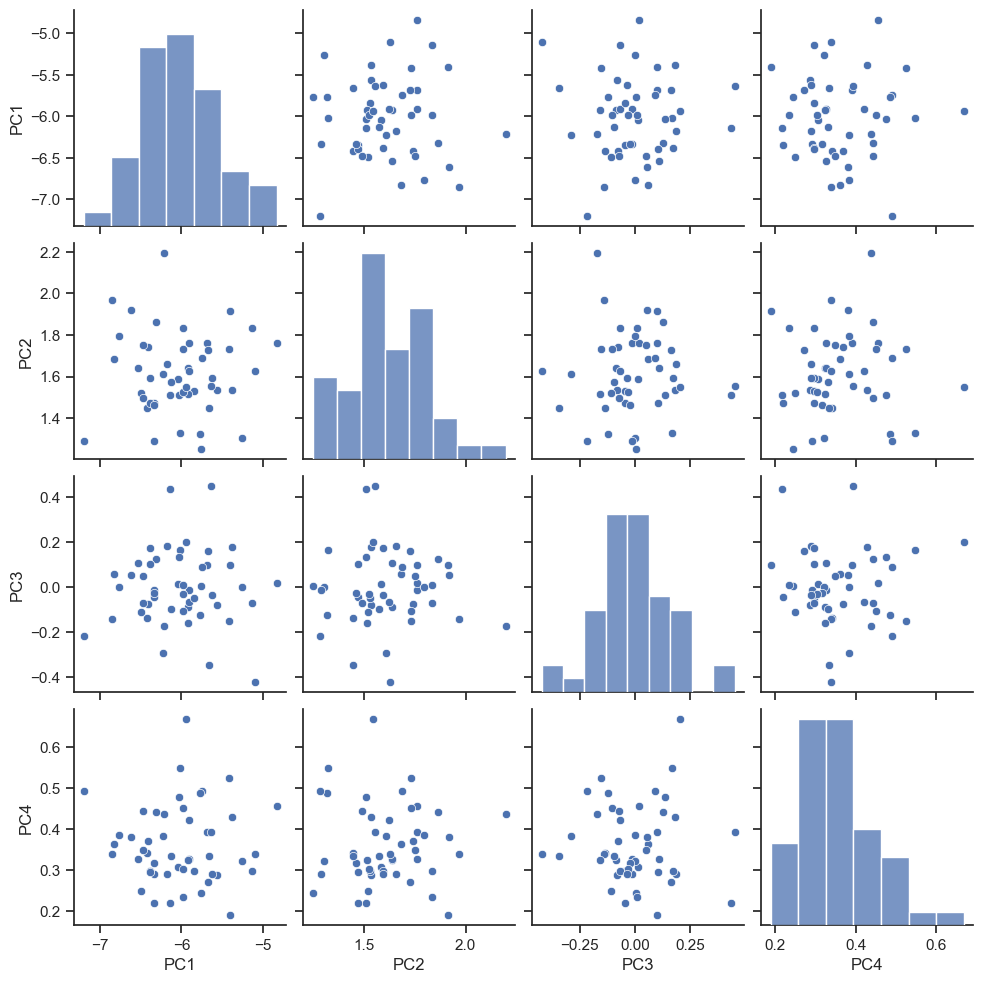

In [19]:
pca_df = pd.DataFrame(data_transform, columns=[f'PC{i+1}' for i in range(data_transform.shape[1])])

# Usar Seaborn's pairplot para visualizar los componentes principales y sus covarianzas
sns.set(style="ticks")
sns.pairplot(pca_df)
plt.show()

In the code you provided, you are performing Principal Component Analysis (PCA) using scikit-learn's PCA implementation, and you're comparing the results to those obtained using a step-by-step procedure. One important thing to note is that PCA results from scikit-learn may have slightly different conventions and transpositions compared to a manual calculation.

Here's a breakdown of the key results from both methods and where they may differ in transposition:

1. `values_pca`:
   - `values_pca` obtained from scikit-learn contains the eigenvalues of the covariance matrix, representing the variance explained by each principal component.
   - If you had calculated eigenvalues manually, they would typically be a column vector. In scikit-learn, they are a 1-D NumPy array.

2. `exp_var_ratio`:
   - `exp_var_ratio` contains the explained variance ratio for each principal component, which indicates the proportion of the total variance explained by each component.
   - This is typically a 1-D array with values between 0 and 1, with one entry per principal component.

3. `vectors_pca`:
   - `vectors_pca` contains the principal components (eigenvectors) as rows. Each row represents a principal component.
   - If you had calculated the principal components manually, they would be the columns of the matrix. In scikit-learn, they are rows.

4. `data_transform`:
   - `data_transform` contains the transformed data in the PCA space.
   - The transposition difference occurs here. In scikit-learn, this matrix will have the transformed data as rows (each row corresponds to an observation/sample, and each column corresponds to a principal component). If you did the manual calculation, your convention might have been to have the transformed data as columns.

To summarize, the main transposition differences are in `vectors_pca` and `data_transform`. In scikit-learn, `vectors_pca` has rows as principal components, and `data_transform` has rows as transformed data points. In a manual calculation, you might have used columns for these matrices.